# Pearson distributions
This notebook computes the parameters for the kurtosis distribution for McKinnon et al 2016

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.stats import rv_continuous, norm, beta

In [2]:
def pearson_coeffs(mu1, mu2, mu3, mu4):
    # Given moments, returns the coefficients of the Pearson ODE
    # Assumes symmetric distribution (mean 0 skew 0)
    a = 0
    b1 = 0
    b0 = 1/2 * mu2 * (3*mu3**2 - 4*mu2*mu4) / (9*mu2**3 + 6*mu3**2 - 5*mu2*mu4)
    b2 = 1/2 * (6*mu2**3 + 3*mu3**2 - 2*mu2*mu4) / (9 * mu2**3 + 6 * mu3**2 - 5 * mu2 * mu4)

    return a, b0, b1, b2

## Start distribution

In [3]:
# Start distribution
mu1 = 0
mu2 = 1
mu3 = 0
mu4 = 2

a, b0, b1, b2 = pearson_coeffs(mu1, mu2, mu3, mu4)
print(a, b0, b1, b2)

0 4.0 0 -1.0


Fit distribution to parameters

Text(0.5, 1.0, 'PDF of Pearson I distribution')

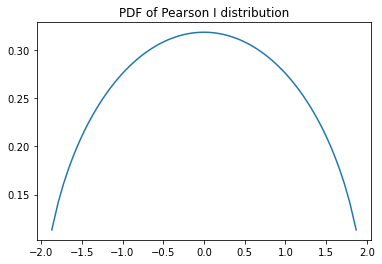

In [4]:
a1 = (-b1 - np.sqrt(b1**2 - 4*b2*b0)) / (2*b2)
a2 = (-b1 + np.sqrt(b1**2 - 4*b2*b0)) / (2*b2)

nu = 1 / (b2 * (a1 - a2))
m1 = nu * (a - a1)
m2 = -nu * (a - a2)
lam = mu1 - (a2 - a1) * (m1 + 1) / (m1 + m2 + 2) - a1

from scipy.stats import beta
qs = np.arange(0.01, 1.00, 0.01)
quantiles = beta.ppf(qs, a=m1+1, b=m2+1, loc=-lam-a1, scale=a1-a2)

plt.plot(quantiles, beta.pdf(quantiles, a=m1+1, b=m2+1, loc=-lam-a1, scale=a1-a2))
plt.title('PDF of Pearson I distribution')

This distribution is engineered to have mean 0, variance 1, skewness 0, and (excess) kurtosis -1:

In [5]:
beta.stats(a=m1+1, b=m2+1, loc=-lam-a1, scale=a1-a2, moments='mvsk')

(array(0.), array(1.), array(0.), array(-1.))

## End distribution (higher kurtosis)

In [12]:
mu1 = 0
mu2 = 1
mu3 = 0
mu4 = 4
a, b0, b1, b2 = pearson_coeffs(mu1, mu2, mu3, mu4) # b0 = 8/11, b2 = 1/11
print(a, b0, b1, b2)

0 0.7272727272727273 0 0.09090909090909091


In [13]:
# Distribution parameters

alpha = np.sqrt(4*b2*b0 - b1**2) / (2 * b2)
m = 1 / (2*b2)
nu = -1 * (2*b2*a - b1) / (2*b2**2 * alpha)
lam0 = 0 # lam0 = b1 / (2 * b2)
lam = lam0 + (alpha * nu) / (2 * (m - 1))

print(alpha, m, nu, lam)

2.8284271247461903 5.5 -0.0 0.0


In [14]:
class pearson7_gen(rv_continuous):
    "Pearson distribution"
    def _pdf(self, x):
        return (1 / (alpha * sc.special.beta(m - 0.5, 0.5))
            * (1 + ((x-lam)/alpha)**2)**-alpha
        )

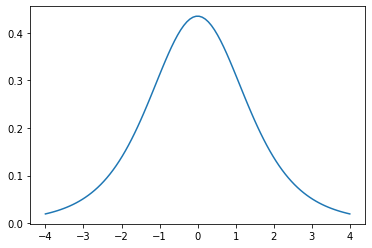

In [15]:
pearson7 = pearson7_gen()
plt.plot(np.linspace(-4,4,100), pearson7.pdf(np.linspace(-4,4,100)))


These are probably floating point errors in the integrand--note how far off even the mean is (which analytically is clearly 0).